# Importing The Libraries


In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import math, copy

# Loading the Dataframe Shrink Ray

In [2]:
df=pd.read_csv('shrink_ray_dataset.csv')
df.shape

(200, 2)

In [3]:
df.head(5)

,Power,Shrinkage
0,0.00,0.00
1,1.51,0.00
2,3.02,0.00
3,4.52,2.67
4,6.03,0.00


In [4]:
df.describe()

,Power,Shrinkage
count,200.000000,200.000000
mean,150.000000,45.274700
std,87.254773,28.252884
min,0.000000,0.000000
25%,75.002500,20.435000
50%,150.000000,43.855000
75%,224.997500,70.595000
max,300.000000,94.920000


Visualizing the data

In [5]:
# Print the column names to verify the actual names
print(df.columns)

Index(['Power', ' Shrinkage'], dtype='object')


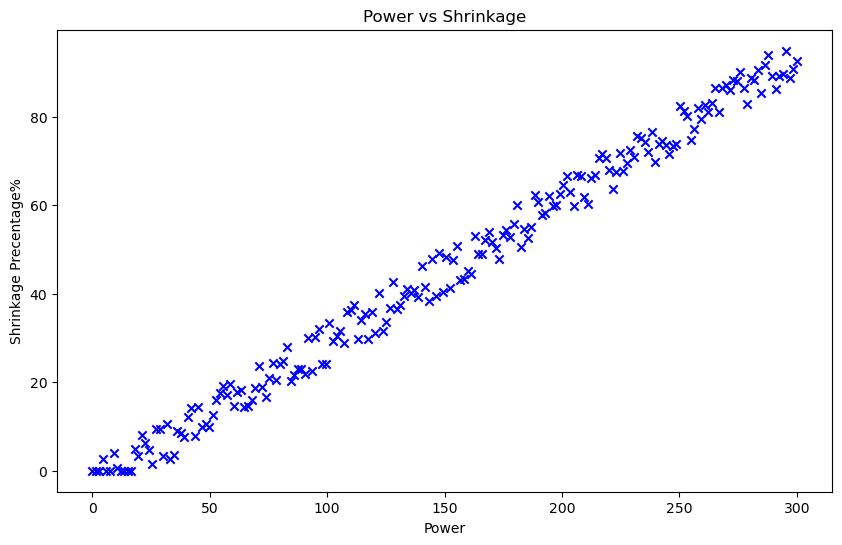

In [6]:
df.columns = df.columns.str.strip()
# Extract the columns for plotting
x_values = df['Power']
y_values = df['Shrinkage']  
plt.figure(figsize=(10, 6))
# Create a scatter plot
plt.scatter(x_values, y_values, marker='x', color='blue')
plt.xlabel('Power')
plt.ylabel('Shrinkage Precentage%')
plt.title('Power vs Shrinkage')
plt.show()

Splitting the Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 1)
Shape of X_test: (40, 1)
Shape of y_train: (160,)
Shape of y_test: (40,)


# Linear Regression Model

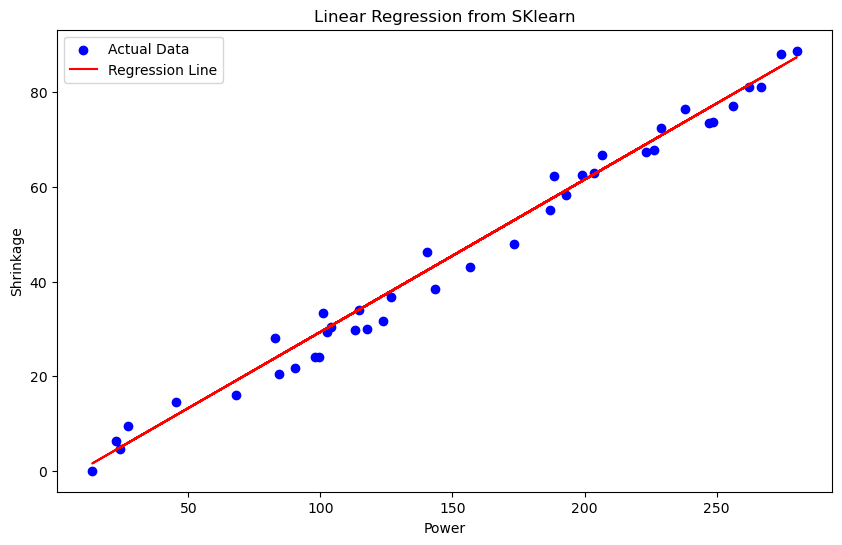

In [8]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Plot the original data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Power')
plt.ylabel('Shrinkage')
plt.title('Linear Regression from SKlearn')
plt.legend()
plt.show()

# **BONUS**


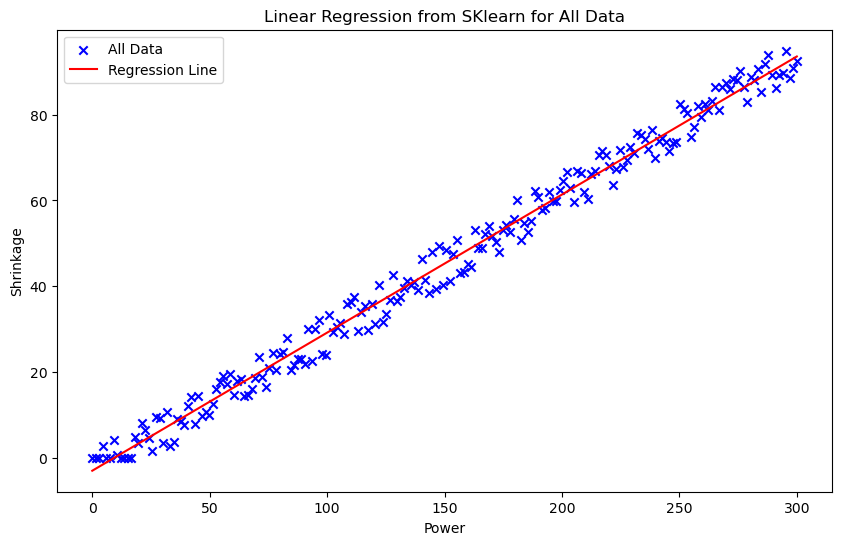

In [9]:
x_values = x_values.values.reshape(-1, 1)
model.fit(x_values, y_values)

# Make predictions on the test data
y_pred_set = model.predict(x_values)

# Plot the original data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x_values, y_values,marker='x', color='blue', label='All Data')
plt.plot(x_values, y_pred_set, color='red', label='Regression Line')
plt.xlabel('Power')
plt.ylabel('Shrinkage')
plt.title('Linear Regression from SKlearn for All Data')
plt.legend()
plt.show()

In [10]:
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9.836533599806979


If Gru needs to shrink the moon with a percentage 85% where should he adjust the knob? 
1-Inverse Prediction Equation

In [11]:
m = model.coef_[0]
b = model.intercept_

# Given a specific value of y
given_y = 85  # Replace this with the desired y value

# Calculate the corresponding x value
predicted_x = (given_y - b) / m
print(f"Predicted Power for Shrinkage = {given_y}% is {predicted_x} MWatts")


Predicted Power for Shrinkage = 85% is 273.36820555127065 MWatts


If Gru needs to shrink the moon with a percentage 85% where should he adjust the knob? 2- Reverse the Regression model

In [12]:
x_values_2 = df['Shrinkage'] 
y_values_2 = df['Power']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_values_2, y_values_2, test_size=0.2, random_state=42)
X_train_2 = X_train_2.values.reshape(-1, 1)
X_test_2 = X_test_2.values.reshape(-1, 1)
model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)
shrinkage_value = 85
predicted_power = model_2.predict([[shrinkage_value]])
formatted_predicted_power = "{:.2f}".format(predicted_power[0])

print(f"Predicted Power for Shrinkage = {shrinkage_value}% is {formatted_predicted_power} MWatts")


Predicted Power for Shrinkage = 85% is 271.60 MWatts


# Linear Regression Model with Gradient Descent

In [13]:
class LinearRegression_Gradient:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)
        self.bias = 0
        
        for _ in range(self.num_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/num_samples) * np.dot(X.T, (y_pred - y))
            db = (1/num_samples) * np.sum(y_pred - y)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias


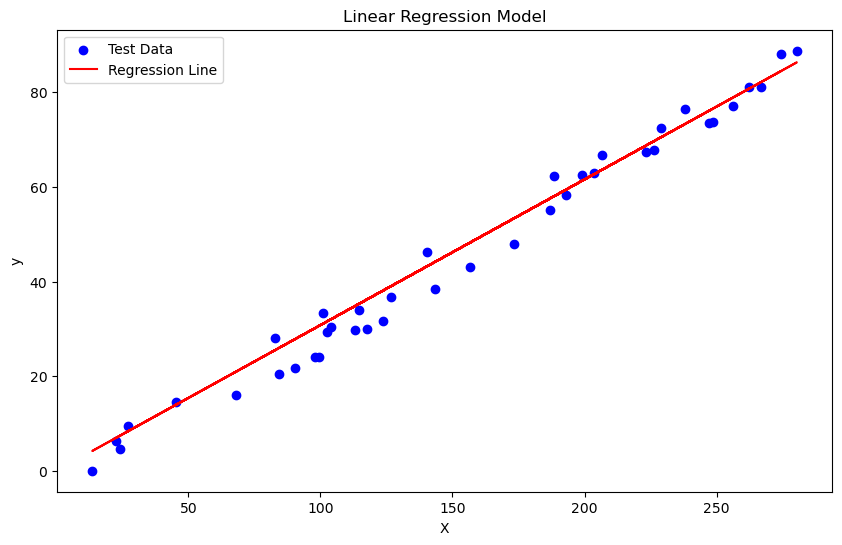

In [14]:

mod = LinearRegression_Gradient(learning_rate=0.000001, num_iterations=1000)
mod.fit(X_train, y_train)

# Make predictions on the test data
y_pred = mod.predict(X_test)

# Plot the model and test data
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.legend()
plt.show()
